In [1]:
import sys
sys.path.append('C:/Users/golov/OneDrive/Документы/OOP/курсовая/OOP_first_coursework')
from ML_Library import Linear_Regression, MSE_Loss
from ML_Library.train_module import normalize_features 
import numpy as np

In [2]:
w_orig_slope = 3.0
b_orig_intercept = 4.0

# Генерируем признаки X
X_true_features = np.array([i for i in range(-50, 51)]).astype(float) # Меньший диапазон для ускорения
# Вычисляем y на основе X и исходных параметров
y_true_targets = (X_true_features * w_orig_slope) + b_orig_intercept

In [3]:
from random import randint
noise_level = 10
y_noisy_targets = np.array([val + randint(-noise_level, noise_level) for val in y_true_targets]).astype(float)

In [4]:
X_data_for_model = X_true_features.reshape(-1, 1)
mean_X_val = np.mean(X_data_for_model, axis=0) # Статистики от X_data_for_model (до нормализации)
std_X_val = np.std(X_data_for_model, axis=0)
if std_X_val[0] == 0: 
    std_X_val[0] = 1.0
X_normalized_data = (X_data_for_model-mean_X_val)/(std_X_val)


In [5]:
y_data_for_model = y_noisy_targets

In [6]:
print(f"Форма X_normalized_data: {X_normalized_data.shape}")
print(f"Форма y_data_for_model: {y_data_for_model.shape}")

Форма X_normalized_data: (101, 1)
Форма y_data_for_model: (101,)


In [73]:
loss_fn=MSE_Loss()
model = Linear_Regression(weight_size=1, bias=True,reg='l2')

epochs = 100

In [74]:
for epoch in range(epochs):
    epoch_loss=0
    for i in range (len(X_data_for_model)):
        X_sample=X_normalized_data[i:i+1]

        y_pred=model.predict(X_sample)

        loss=loss_fn.get_loss(y_pred=y_pred,y_true=y_data_for_model[i:i+1])
        epoch_loss+=loss

        loss_grad=loss_fn.get_grad(y_pred=y_pred,y_true=y_data_for_model[i:i+1])

        model.compute_gradients(X_sample,loss_grad)

        model.update_weights()
    if epoch%10==0:
        print(epoch,epoch_loss/len(X_data_for_model))



0 1882.6316522619702
10 30.190185527965617
20 30.190185524828248
30 30.190185524828248
40 30.190185524828248
50 30.190185524828248
60 30.190185524828248
70 30.190185524828248
80 30.190185524828248
90 30.190185524828248


In [75]:
y_pred_my_model_MSE = model.predict(X_normalized_data)

In [76]:
final_w_learned_MSE, final_b_learned_MSE = model.get_weights()

In [77]:
w_effective_MSE = final_w_learned_MSE.squeeze() / std_X_val[0]
b_effective_MSE = final_b_learned_MSE - (final_w_learned_MSE.squeeze() * mean_X_val[0] / std_X_val[0])

теперь обучим модель из slkearn для сравнения

In [78]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

In [79]:
sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X_data_for_model, y_data_for_model) 

LinearRegression()

In [80]:

sklearn_w = sklearn_model.coef_[0]
sklearn_b = sklearn_model.intercept_
print(f"Sklearn модель: w={sklearn_w:.4f}, b={sklearn_b:.4f}")

# Предсказания модели sklearn на X_data
y_pred_sklearn = sklearn_model.predict(X_data_for_model)


Sklearn модель: w=3.0089, b=4.6634


визуализация

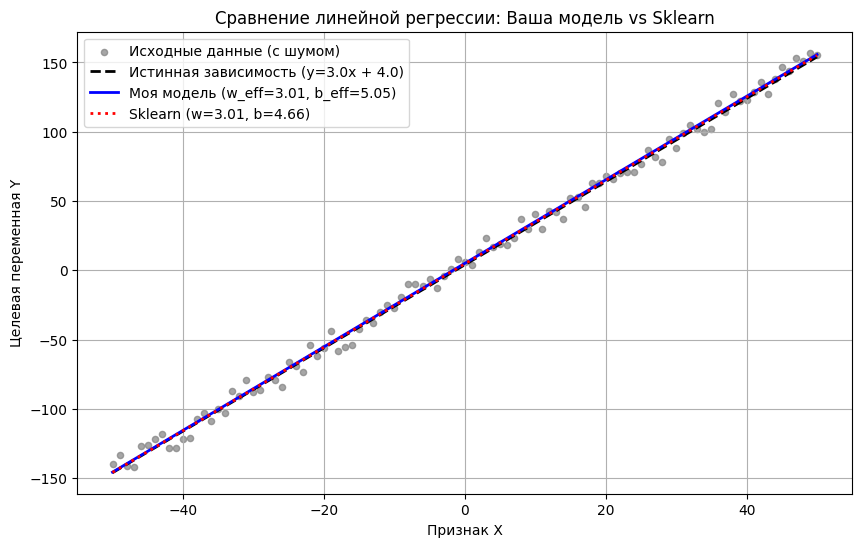

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(X_true_features, y_data_for_model, color='gray', label='Исходные данные (с шумом)', s=20, alpha=0.7)
plt.plot(X_data_for_model, y_true_targets, color='black', linestyle='--', linewidth=2, label=f'Истинная зависимость (y={w_orig_slope}x + {b_orig_intercept})')

# Предсказания вашей модели. y_pred_my_model уже в правильном масштабе Y.
plt.plot(X_data_for_model, y_pred_my_model_MSE, color='blue', linewidth=2, label=f'Моя модель (w_eff={w_effective_MSE:.2f}, b_eff={b_effective_MSE:.2f})')

plt.plot(X_data_for_model, y_pred_sklearn, color='red', linewidth=2, linestyle=':', label=f'Sklearn (w={sklearn_w:.2f}, b={sklearn_b:.2f})')

plt.xlabel("Признак X")
plt.ylabel("Целевая переменная Y")
plt.title("Сравнение линейной регрессии: Ваша модель vs Sklearn")
plt.legend()
plt.grid(True)
plt.show()


Теперь посмотрим на линейную регррессию

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ML_Library.linear_module import Logistic_Regression
from ML_Library.losses_module import Log_loss
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score


In [82]:
# Генерируем данные
np.random.seed(42)
n_samples = 100

# Первый шар (класс 0)
center0 = np.array([-2, -2])
radius0 = 2
theta0 = 2 * np.pi * np.random.rand(n_samples)
r0 = radius0 + 0.2 * np.random.randn(n_samples)
x0 = center0[0] + r0 * np.cos(theta0)
y0 = center0[1] + r0 * np.sin(theta0)
X0 = np.stack([x0, y0], axis=1)
y0 = np.zeros(n_samples)

# Второй шар (класс 1)
center1 = np.array([2, 2])
radius1 = 2
theta1 = 2 * np.pi * np.random.rand(n_samples)
r1 = radius1 + 0.2 * np.random.randn(n_samples)
x1 = center1[0] + r1 * np.cos(theta1)
y1 = center1[1] + r1 * np.sin(theta1)
X1 = np.stack([x1, y1], axis=1)
y1 = np.ones(n_samples)
# Объединяем данные
X = np.vstack([X0, X1])
y = np.concatenate([y0, y1])

# Перемешиваем
idx = np.random.permutation(len(y))
X = X[idx]
y = y[idx]


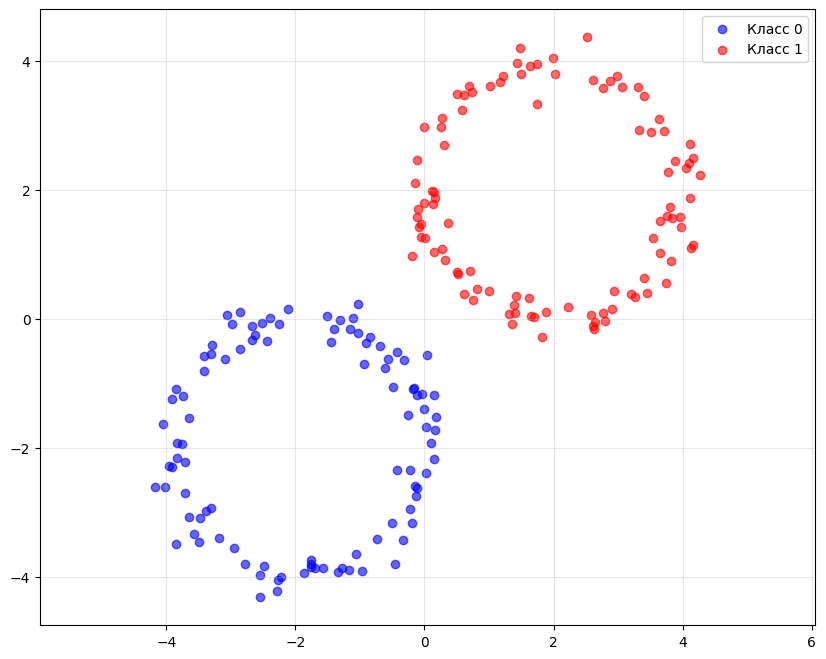

In [83]:
# Визуализация
plt.figure(figsize=(10, 8))

# Рисуем точки данных
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Класс 0', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Класс 1', alpha=0.6)
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

In [84]:

our_model = Logistic_Regression(weight_size=2, learning_rate=1,reg='l2')
loss_fn = Log_loss()


In [85]:
# Обучение нашей модели
n_epochs = 1000
for epoch in range(n_epochs):
    y_pred = our_model.predict_proba(X)

    loss = loss_fn.get_loss(y_pred, y)

    grad = loss_fn.get_grad(y_pred, y)

    our_model.compute_gradients(X, grad)
    
    our_model.update_weights()

In [86]:
# Обучаем sklearn модель
sklearn_model = SklearnLogisticRegression(penalty='l2', C=1/0.01)
sklearn_model.fit(X, y)


LogisticRegression(C=100.0)

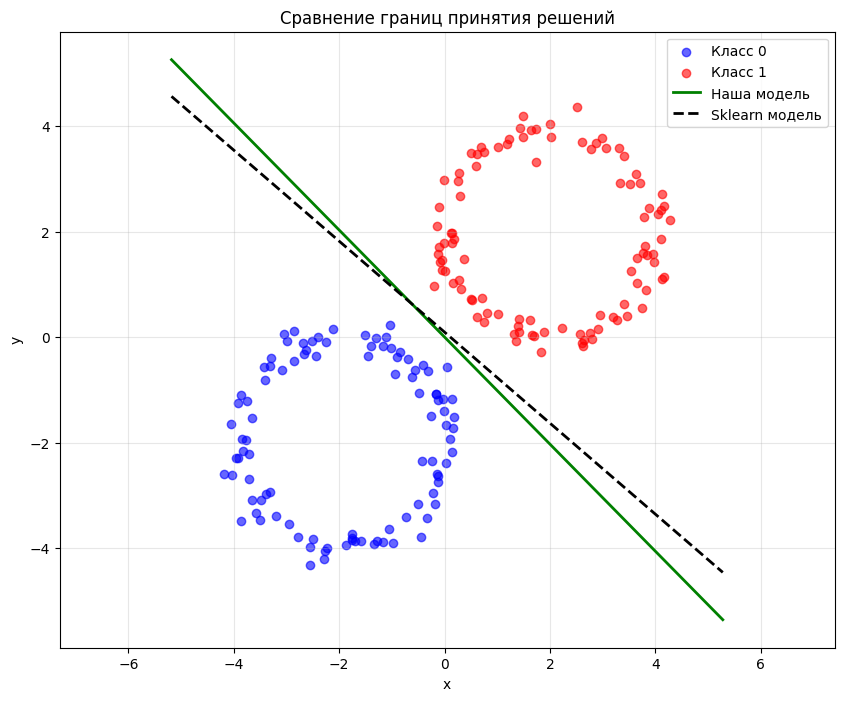

In [87]:
# Визуализация результатов
plt.figure(figsize=(10, 8))

# Рисуем точки данных
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Класс 0', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Класс 1', alpha=0.6)

# Граница нашей модели
w_our, b_our = our_model.get_weights()
x_line = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
y_line_our = -(w_our[0] * x_line + b_our) / w_our[1]
plt.plot(x_line, y_line_our, 'g-', linewidth=2, label='Наша модель')

# Граница sklearn модели
w_sklearn = sklearn_model.coef_[0]
b_sklearn = sklearn_model.intercept_[0]
y_line_sklearn = -(w_sklearn[0] * x_line + b_sklearn) / w_sklearn[1]
plt.plot(x_line, y_line_sklearn, 'k--', linewidth=2, label='Sklearn модель')

plt.title('Сравнение границ принятия решений')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()


In [88]:
# Сравнение метрик
our_pred = our_model.predict(X)
sklearn_pred = sklearn_model.predict(X)

print("\nСравнение метрик:")
print(f"Точность нашей модели: {accuracy_score(y, our_pred):.4f}")
print(f"Точность sklearn модели: {accuracy_score(y, sklearn_pred):.4f}")
print("\nВеса нашей модели:", w_our, b_our)
print("Веса sklearn модели:", w_sklearn, b_sklearn)


Сравнение метрик:
Точность нашей модели: 1.0000
Точность sklearn модели: 1.0000

Веса нашей модели: [0.23698954 0.23329891] -0.00029168591144425977
Веса sklearn модели: [4.91297722 5.69006288] -0.5415413224417164
